In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [109]:
# Veri seti oluşturma
np.random.seed(42)
n_samples = 200

# Özellikler: Müşteri davranış verileri
musteri_data = {
    'aylik_ucret': np.random.uniform(50, 500, n_samples),
    'kullanim_suresi_ay': np.random.randint(1, 60, n_samples),
    'destek_cagri_sayisi': np.random.randint(0, 10, n_samples),
    'son_odeme_gecikmesi': np.random.randint(0, 30, n_samples),
    'hizmet_sayisi': np.random.randint(1, 5, n_samples)
}

df_musteri = pd.DataFrame(musteri_data)

In [110]:
# Hedef değişken: Churn (0: Kalmaya devam, 1: Ayrıldı)
# Daha fazla destek çağrısı, ödeme gecikmesi = daha yüksek churn riski
churn_probability = (
    0.3 * (df_musteri['destek_cagri_sayisi'] / 10) +
    0.3 * (df_musteri['son_odeme_gecikmesi'] / 30) +
    0.2 * (1 - df_musteri['kullanim_suresi_ay'] / 60) +
    0.2 * np.random.random(n_samples)
)
df_musteri['churn'] = (churn_probability > 0.5).astype(int)

In [111]:
print("\nVeri Seti Özeti:")
print(df_musteri.head(10))
print(f"\nChurn Dağılımı:\n{df_musteri['churn'].value_counts()}")


Veri Seti Özeti:
   aylik_ucret  kullanim_suresi_ay  destek_cagri_sayisi  son_odeme_gecikmesi  \
0   218.543053                  24                    8                   10   
1   477.821438                  52                    4                   27   
2   379.397274                  11                    0                    4   
3   319.396318                  49                    9                    3   
4   120.208388                   8                    9                    2   
5   120.197534                  36                    0                   18   
6    76.137625                  38                    1                   19   
7   439.779266                  40                    5                   24   
8   320.501755                  20                    8                   17   
9   368.632660                  35                    7                   14   

   hizmet_sayisi  churn  
0              1      0  
1              2      1  
2              1      0

In [112]:
# Veriyi ayırma
X_clf = df_musteri.drop('churn', axis=1)
y_clf = df_musteri['churn']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, 
    y_clf, 
    test_size=0.2, 
    random_state=42
)

In [113]:
dt_classifier = DecisionTreeClassifier(
    max_depth=4,              # Ağacın maksimum derinliği
    min_samples_leaf=6,       # Yaprak düğümde minimum örnek sayısı
    criterion='gini',         # Bölme kriteri: 'gini' veya 'entropy'
    random_state=42
)

dt_classifier.fit(X_train_clf, y_train_clf)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [114]:
# Tahminler
y_pred_clf = dt_classifier.predict(X_test_clf)
y_pred_proba_clf = dt_classifier.predict_proba(X_test_clf)

In [115]:
# Model Değerlendirme
print("\nModel Performansı:")
print(f"Eğitim Doğruluğu: {dt_classifier.score(X_train_clf, y_train_clf):.4f}")
print(f"Test Doğruluğu: {dt_classifier.score(X_test_clf, y_test_clf):.4f}")
print(f"\nAccuracy Score: {accuracy_score(y_test_clf, y_pred_clf):.4f}")

print("\nKarmaşıklık Matrisi:")
print(confusion_matrix(y_test_clf, y_pred_clf))


Model Performansı:
Eğitim Doğruluğu: 0.9187
Test Doğruluğu: 0.8250

Accuracy Score: 0.8250

Karmaşıklık Matrisi:
[[25  2]
 [ 5  8]]


In [116]:
print("\nSınıflandırma Raporu:")
print(classification_report(y_test_clf, y_pred_clf, 
                          target_names=['Kaldı', 'Ayrıldı']))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

       Kaldı       0.83      0.93      0.88        27
     Ayrıldı       0.80      0.62      0.70        13

    accuracy                           0.82        40
   macro avg       0.82      0.77      0.79        40
weighted avg       0.82      0.82      0.82        40



In [117]:
# Özellik Önemleri
print("\nÖzellik Önemleri:")
feature_importance_clf = pd.DataFrame({
    'Özellik': X_clf.columns,
    'Önem': dt_classifier.feature_importances_
}).sort_values('Önem', ascending=False)
print(feature_importance_clf)


Özellik Önemleri:
               Özellik      Önem
3  son_odeme_gecikmesi  0.438042
2  destek_cagri_sayisi  0.319902
1   kullanim_suresi_ay  0.211699
0          aylik_ucret  0.030356
4        hizmet_sayisi  0.000000


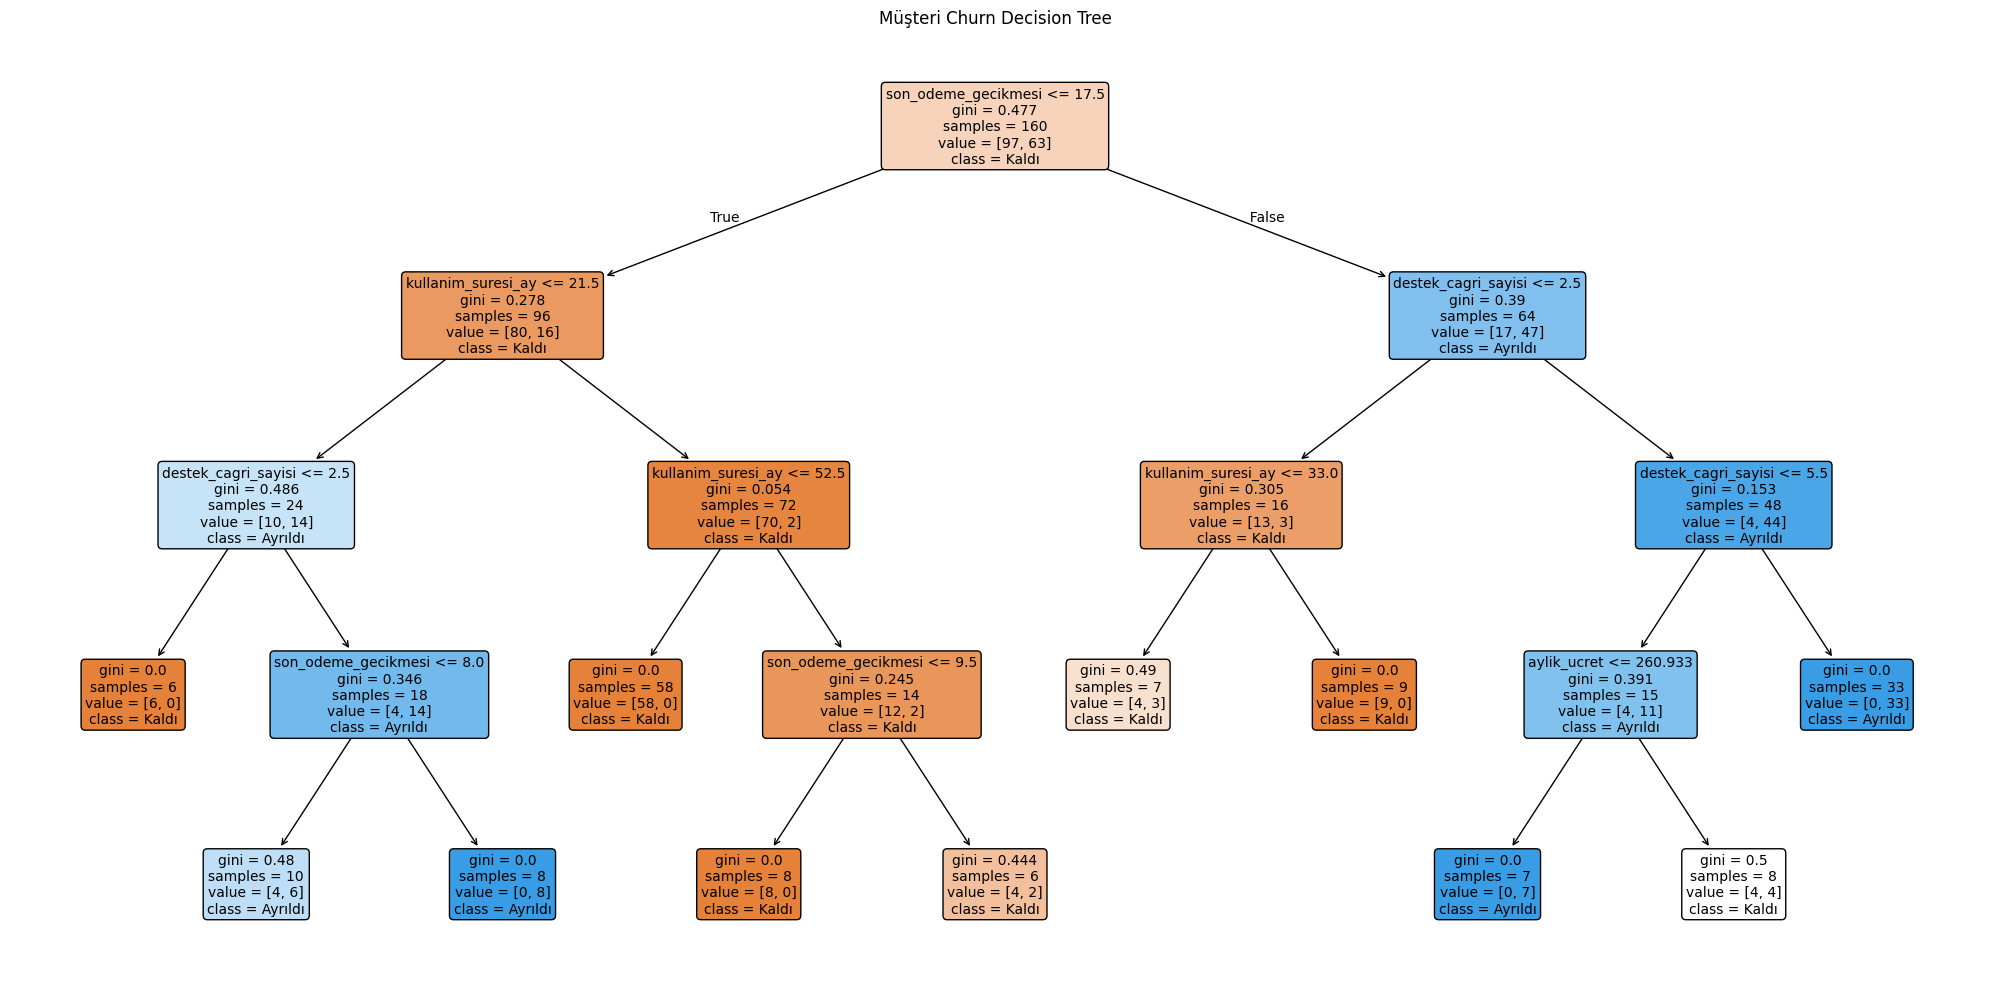

In [118]:
# Matplotlib ile görselleştirme
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier, 
               feature_names=X_clf.columns,
               class_names=['Kaldı', 'Ayrıldı'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Müşteri Churn Decision Tree')
plt.tight_layout()
plt.show()

In [119]:
depths = range(1, 11)
train_scores = []
test_scores = []

for depth in depths:
    model = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    )
    
    model.fit(X_train_clf, y_train_clf)
    
    train_scores.append(model.score(X_train_clf, y_train_clf))
    test_scores.append(model.score(X_test_clf, y_test_clf))


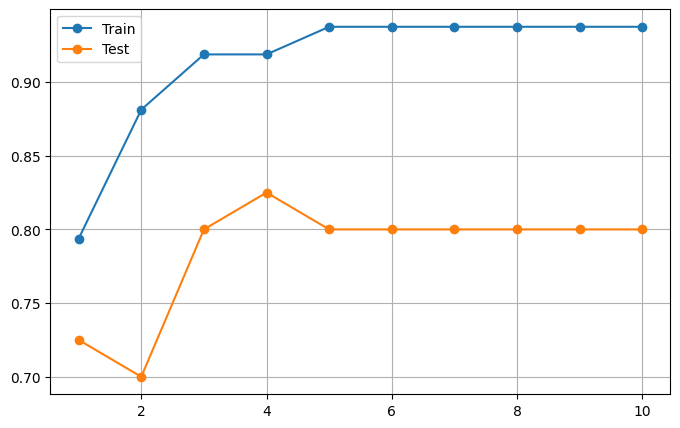

In [120]:
plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, marker='o', label='Train')
plt.plot(depths, test_scores, marker='o', label='Test')
plt.legend()
plt.grid(True)
plt.show()